### Solution to the assignments of checkpoint 6

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy.stats.stats import ttest_ind
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [8]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw,postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance', con=engine)

# no need for an open connection,
# as we're only doing a single query
engine.dispose()

### 1. Are there any differences between the enders, ethnicities and parental level of education with respect to their performances in exams?

In [9]:
student_df.groupby("gender").mean()[['math score', 'reading score', 'writing score']]

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [10]:
ttest_ind(student_df[student_df.gender == 'female'][["math score", "reading score", "writing score"]],
         student_df[student_df.gender == 'male'][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([-5.38324587,  7.95930801,  9.97955791]), pvalue=array([9.12018555e-08, 4.68053874e-15, 2.01987771e-22]))

It seems that females are more successful at reading and writing whereas males are more successful at math.  The t-tests justify that the differences are statistically significant.

In [11]:
student_df.groupby("race/ethnicity").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [12]:
# Test whether group differences are significant.
ethnicities = student_df["race/ethnicity"].unique()
grouped_df = student_df.groupby("race/ethnicity")
for var in ["math score", "reading score", "writing score"]:
    print("-----------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("-----------------------------------------------")
    for i in range(0, len(ethnicities)):
        for j in range(i+1, len(ethnicities)):
            print(
                "T-TEST BETWEEN GROUPS {0} AND {1}:".format(ethnicities[i], ethnicities[j]))
            print(ttest_ind(
                student_df[student_df["race/ethnicity"]
                          == ethnicities[i]][var],
                student_df[student_df["race/ethnicity"] == ethnicities[j]][var]
            ))

-----------------------------------------------
Comparisons for variable: math score
-----------------------------------------------
T-TEST BETWEEN GROUPS group B AND group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
T-TEST BETWEEN GROUPS group B AND group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
T-TEST BETWEEN GROUPS group B AND group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
T-TEST BETWEEN GROUPS group B AND group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
T-TEST BETWEEN GROUPS group C AND group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
T-TEST BETWEEN GROUPS group C AND group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
T-TEST BETWEEN GROUPS group C AND group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
T-TEST BETWEEN GROUPS group A AND group D:
Tt

Taking into account the t statistics, there are significant differences except between the groups A, B, and C

In [13]:
student_df.groupby("parental level of education").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [14]:
# Test whether group differences are significant.
ethnicities = student_df["parental level of education"].unique()
grouped_df = student_df.groupby("parental level of education")
for var in ["math score", "reading score", "writing score"]:
    print("-----------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("-----------------------------------------------")
    for i in range(0, len(ethnicities)):
        for j in range(i+1, len(ethnicities)):
            print(
                "T-TEST BETWEEN GROUPS {0} AND {1}:".format(ethnicities[i], ethnicities[j]))
            print(ttest_ind(
                student_df[student_df["parental level of education"]
                          == ethnicities[i]][var],
                student_df[student_df["parental level of education"] == ethnicities[j]][var]
            ))

-----------------------------------------------
Comparisons for variable: math score
-----------------------------------------------
T-TEST BETWEEN GROUPS bachelor's degree AND some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
T-TEST BETWEEN GROUPS bachelor's degree AND master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
T-TEST BETWEEN GROUPS bachelor's degree AND associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
T-TEST BETWEEN GROUPS bachelor's degree AND high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843376e-05)
T-TEST BETWEEN GROUPS bachelor's degree AND some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
T-TEST BETWEEN GROUPS some college AND master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
T-TEST BETWEEN GROUPS some college AND associate's degree:
T

There are some significant differences between some groups like master's degree and high school

### 2. Are there any differences between the lunch types with respect to their performances in exams?  If there are, how do you explain this?

In [15]:
student_df.groupby("lunch").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [16]:
ttest_ind(student_df[student_df.lunch == "free/reduced"][["math score", "reading score", "writing score"]],
         student_df[student_df.lunch == "standard"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([-11.83718047,  -7.45105647,  -8.0097842 ]), pvalue=array([2.41319560e-30, 2.00279665e-13, 3.18618958e-15]))

Yes, students who have standard lunch are more successful than the others

### 3. Does the test preparation course seem to have an effect on the exam performances?

In [17]:
student_df.groupby("test preparation course").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [18]:
ttest_ind(student_df[student_df["test preparation course"] == "completed"][["math score", "reading score", "writing score"]],
         student_df[student_df["test preparation course"] == "none"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([ 5.70461642,  7.87166354, 10.40917344]), pvalue=array([1.53591346e-08, 9.08178334e-15, 3.68529174e-24]))

Yes, those who completed the test preparation course are more successful than the others.

### 4. Which two exam scores are correlated the most with each other?

In [19]:
student_df[["math score", "reading score", "writing score"]].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


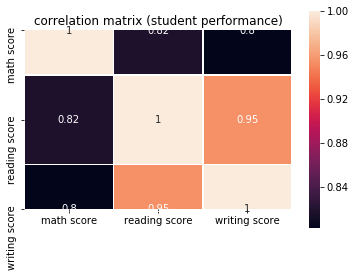

In [30]:
# make the correlation matrices.
corrmat_student = student_df[["math score", "reading score", "writing score"]].corr()

# heatmaps are a great way to get 
# a quick visual read on a big correlation matrix.

#plt.figure(figsize=(18,4))

# draw the heatmap using seaborn.
sns.heatmap(corrmat_student, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (student performance)")

plt.show()

# try to match the correlation numbers 
# to the scatterplots above to get a 
# sense of what each magnitude of 
# correlation can look like.

Reading and writing are more correlated than any other combination.